# Tugas Praktikum 2 - Linear Regression

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

## Load Dataset

In [2]:
d = pd.read_csv('Data_Gaji.csv', delimiter=';')

## Menampilkan Properti Data

In [3]:
d.head()

,Tahun_Pengalaman,Gaji
0,1.1,590145000
1,1.3,693075000
2,1.5,565965000
3,2.0,652875000
4,2.2,598365000


In [4]:
d.shape

(30, 2)

In [5]:
d.dtypes

Tahun_Pengalaman    float64
Gaji                  int64
dtype: object

## Cek Missing Value dan Duplikasi Data

In [6]:
d.isnull().sum()

Tahun_Pengalaman    0
Gaji                0
dtype: int64

In [7]:
d.duplicated().sum()

np.int64(0)

## Memisahkan Data Fitur dan Data Label

In [8]:
X = d.iloc[:, :-1]
y = d.iloc[:, -1]

## Train Test Split

In [9]:
# Membagi dataset menjadi 80% Data Training dan 20% Data Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [10]:
# Ubah dari dataframe / series pandas menjadi np.array
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [11]:
# Normalisasi dengan MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Buat Classifier dan Lakukan Training

### Linear Regression

In [12]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
# Prediksi Data Test
y_pred = regressor.predict(X_test)

In [14]:
y_pred

array([1.53964675e+09, 1.60898026e+09, 1.10977904e+09, 9.57245333e+08,
       1.38711305e+09, 1.73378056e+09])

In [15]:
y_test

array([1707180000, 1641465000,  990435000,  854355000, 1474095000,
       1689525000])

In [16]:
# Menghitung prediksi harga kamar berdasarkan data training
y_pred = regressor.predict(X_test)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Menghitung Coefficient of Determination (R-Squared)
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R-Squared):", r2)

Mean Squared Error (MSE): 1.0579413688280266e+16
Coefficient of Determination (R-Squared): 0.9102354571044844


## Melakukan Visualisasi Data Train dan Data Test

Text(0, 0.5, 'Gaji')

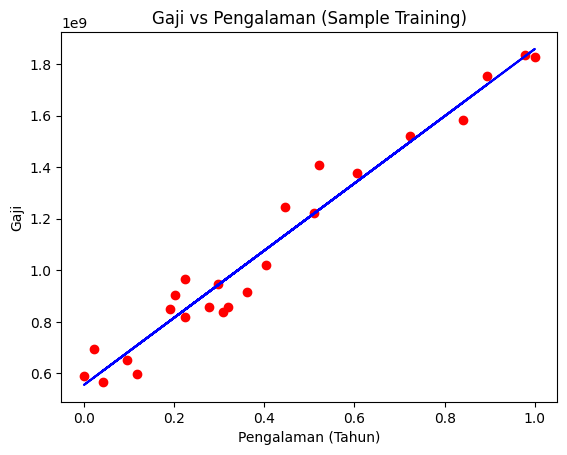

In [17]:
# Visualisasikan sample training
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Gaji vs Pengalaman (Sample Training)')
plt.xlabel('Pengalaman (Tahun)')
plt.ylabel('Gaji')

Text(0, 0.5, 'Gaji')

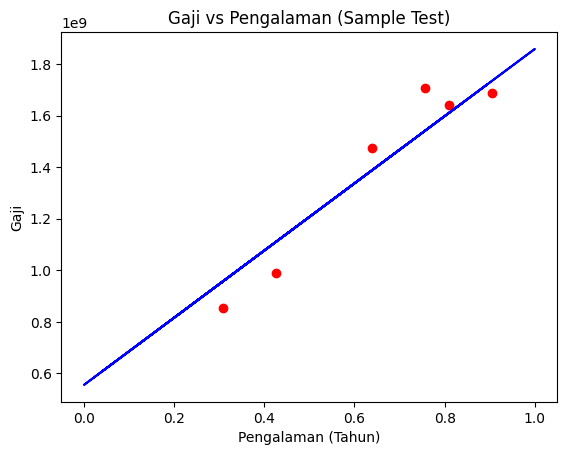

In [18]:
# Visualisasikan Sample Test
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Gaji vs Pengalaman (Sample Test)')
plt.xlabel('Pengalaman (Tahun)')
plt.ylabel('Gaji')

## Melakukan Tunning

### Linear Regression

In [19]:
regressor = LinearRegression(
    fit_intercept=True,   # Apakah menambahkan intersep (bias). Default: True
    copy_X=True,          # Apakah menyalin X sebelum diproses. Default: True
    # Jumlah core CPU yang dipakai untuk perhitungan. Bisa di-set -1 biar semua core
    n_jobs=None,
    positive=False        # Jika True, hanya menghasilkan koefisien positif
)

param_ridge = {
    'fit_intercept': [True, False],
    'copy_X': [True],
    'n_jobs': [-1],
    # Tapi ini hanya didukung mulai scikit-learn versi 0.24
    'positive': [False, True]
}

regressor = LinearRegression()
grid_tree = GridSearchCV(regressor, param_ridge, cv=5)
grid_tree.fit(X_train, y_train)
y_pred = grid_tree.predict(X_test)

In [20]:
# Prediksi dengan model terbaik
y_pred = grid_tree.predict(X_test)

# Hitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Cetak hasil
print("Best Parameters:", grid_tree.best_params_)
print("R² Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
R² Score: 0.9102354571044844
Mean Squared Error (MSE): 1.0579413688280266e+16
Mean Absolute Error (MAE): 92248312.4591556


In [21]:
# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Menghitung Coefficient of Determination (R-squared)
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R-squared):", r2)

Mean Squared Error (MSE): 1.0579413688280266e+16
Coefficient of Determination (R-squared): 0.9102354571044844


Text(0, 0.5, 'Gaji')

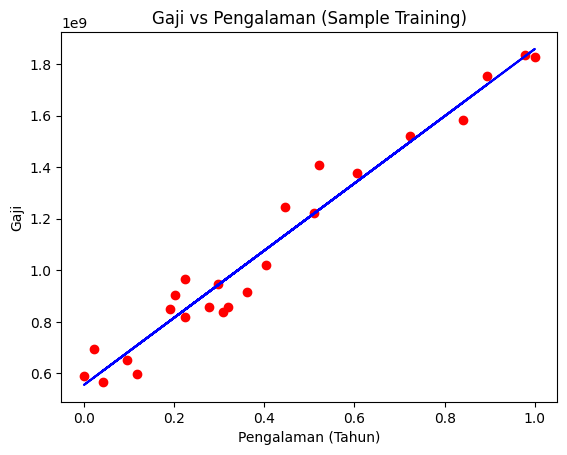

In [22]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, grid_tree.predict(X_train), color='blue')
plt.title('Gaji vs Pengalaman (Sample Training)')
plt.xlabel('Pengalaman (Tahun)')
plt.ylabel('Gaji')

Text(0, 0.5, 'Gaji')

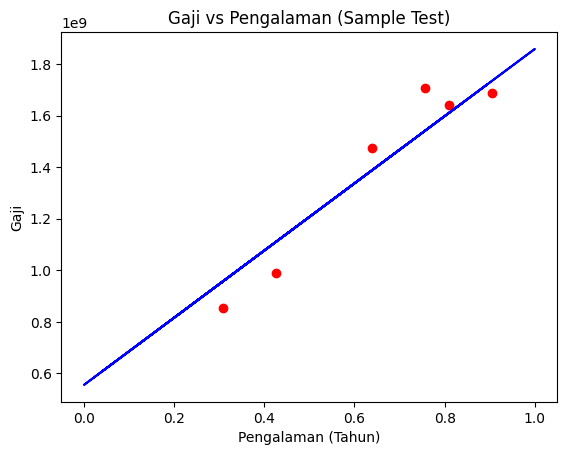

In [23]:
# Visualisasikan sample test
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, grid_tree.predict(X_train), color='blue')
plt.title('Gaji vs Pengalaman (Sample Test)')
plt.xlabel('Pengalaman (Tahun)')
plt.ylabel('Gaji')